In [17]:
import pandas as pd
import numpy as np

late_shipments = pd.read_feather("../../data/late_shipments.feather")

is_late = late_shipments[late_shipments["late"] == "Yes"]
isnt_late = late_shipments[late_shipments["late"] == "No"]

# Calculate the sample means
xbar_no = isnt_late["weight_kilograms"].mean()
xbar_yes = is_late["weight_kilograms"].mean()

# Calculate the sample standard deviation
s_no = isnt_late["weight_kilograms"].std()
s_yes = is_late["weight_kilograms"].std()

# Calculate the sample size
n_no = isnt_late["weight_kilograms"].count()
n_yes = isnt_late["weight_kilograms"].count()

In [9]:
# Two sample mean test statistic
# The hypothesis test for determining if there is a difference between the 
#     means of two populations uses a different type of test statistic to 
#     the z-scores you saw in Chapter 1. It's called "t", and it can be 
#     calculated from three values from each sample using this equation.

In [18]:
# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no**2/n_no + s_yes**2/n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

6.184310184719316


In [20]:
# From t to p
# Previously, you calculated the test statistic for the two-sample problem 
#    of whether the mean weight of shipments is smaller for shipments that 
#    weren't late (late == "No") compared to shipments that were late 
#    (late == "Yes"). In order to make decisions about it, you need to 
#    transform the test statistic with a cumulative distribution function 
#    to get a p-value.
#
# Recall the hypotheses:
# H0: The mean weight of shipments that weren't late is the same as the 
#    mean weight of shipments that were late.
# HA: The mean weight of shipments that weren't late is less than the mean 
#    weight of shipments that were late.
# The test statistic, t_stat, is available, as are the samples sizes for 
#    each group, n_no and n_yes. Use a significance level of alpha = 0.05.

# Left handed hypothesis
from scipy.stats import t
t_stat = -2.3936661778766433

In [21]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008389318958947302


In [22]:
# Reject the null hypothesis p_value >= alpha

In [24]:
import matplotlib.pyplot as plt

dem_votes = pd.read_feather("../../data/dem_votes_potus_12_16.feather")
repub_votes = pd.read_feather("../../data/repub_votes_potus_08_12.feather")

sample_dem_data = dem_votes.sample(frac=.8, replace=True)

In [25]:
# Create a new diff column containing the percentage of votes for the democratic 
#    candidate in 2012 minus the percentage of votes for the democratic candidate 
#    in 2016.

In [26]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

        state    county  dem_percent_12  dem_percent_16       diff
15   Arkansas    Baxter       26.743885       21.091774   5.652112
40   Colorado   Alamosa       56.753537       45.957631  10.795906
120   Indiana    Starke       43.511538       26.978105  16.533432
422     Texas  Lampasas       20.530261       18.074345   2.455916
348  Oklahoma    Carter       28.664876       21.592748   7.072127
..        ...       ...             ...             ...        ...
357  Oklahoma  Stephens       23.381017       17.236372   6.144646
10    Alabama    Monroe       45.890923       42.177003   3.713919
426     Texas  McLennan       34.469621       34.224470   0.245150
84    Georgia   Webster       49.031171       42.383513   6.647658
142    Kansas      Clay       22.626153       17.722513   4.903640

[400 rows x 5 columns]


In [27]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

6.947169934386476


In [28]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

5.289320410580811


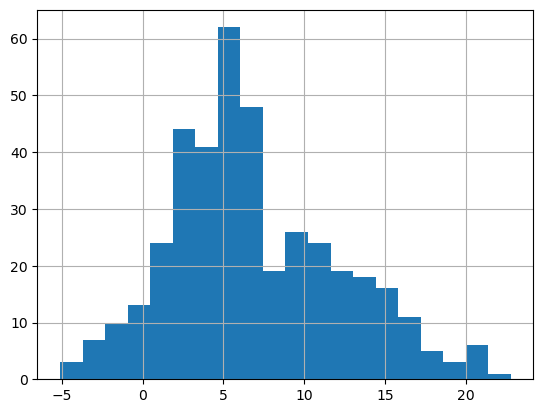

In [29]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [34]:
# Conduct a t-test on the sample differences (the diff column of sample_dem_data), 
#     using an appropriate alternative hypothesis chosen from "two-sided", "less", 
#     and "greater".

#! pip install pingouin
import pingouin

In [35]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],               
                y=0,               
                alternative="two-sided")
                              
# Print the test results
print(test_results)

                T  dof alternative         p-val         CI95%   cohen-d  \
T-test  26.268667  399   two-sided  5.049641e-89  [6.43, 7.47]  1.313433   

             BF10  power  
T-test  2.084e+85    1.0  


In [36]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                              y=sample_dem_data['dem_percent_16'],
                              paired=True,
                              alternative="two-sided")

                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative         p-val         CI95%   cohen-d  \
T-test  26.268667  399   two-sided  5.049641e-89  [6.43, 7.47]  0.475625   

             BF10  power  
T-test  2.084e+85    1.0  


In [37]:
import seaborn as sns

In [38]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby(by=["shipment_mode"])["pack_price"].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [39]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


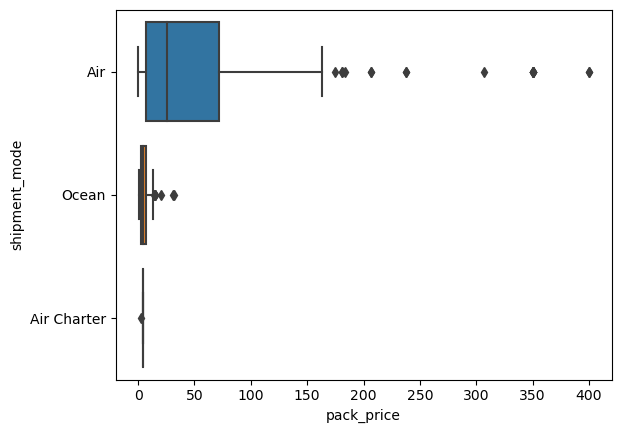

In [40]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(data=late_shipments, x="pack_price", y="shipment_mode")
plt.show()

In [41]:
alpha = 0.1
# Run an ANOVA on late_shipments investigating 'pack_price' (the dependent 
#     variable) between the groups of 'shipment_mode'

# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                dv="pack_price",
                between="shipment_mode")

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [42]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                         dv="pack_price",
                         between="shipment_mode",
                         padjust="none") 

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [43]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  
